<a href="https://colab.research.google.com/github/carefreeone12/deep-learning-journey/blob/main/00-foundations/feature_engineering_numerical_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Feature Engineering: Numerical Transformations

### 1. Centering Our Data

Data centering involves subtracting the mean of a data set from each data point so that the new mean is 0. This process helps us understand how far above or below each of our data points is from the mean. It is also know as **Mean-Centering** or **Zero-Centering**.

Example (step-by-step arithmetic):

1. Data: [2, 4, 6, 8]

2. Sum: 2 + 4 = 6; 6 + 6 = 12; 12 + 8 = 20.

3. Mean = 20 ÷ 4 = 5.

4. Centered values = [2−5, 4−5, 6−5, 8−5] = [−3, −1, +1, +3].

#### Why do it?

* Puts features on a common reference (zero) which helps optimization (faster convergence for gradient methods).

* Required/very helpful for methods that assume zero-mean input or are sensitive to scale: PCA, linear/logistic regression, neural networks, k-means, many distance-based methods.

* Not necessary for tree-based models (decision trees, random forests, gradient-boosted trees) — they’re scale/shift invariant.

In [ ]:
# First import the file
coffee = pd.read_csv('/content/starbucks_customers.csv')
coffee.head() # To check the data

,spent,nearest_starbucks,age,rate_quality,rate_price,rate_promo,ambiance,wifi,service,meetings_hangout
0,13,8,52,4,4,4,4,4,4,4
1,25,8,35,4,5,5,4,4,3,3
2,10,8,29,2,1,5,2,2,2,2
3,7,8,28,4,1,4,5,3,3,4
4,10,8,28,4,2,4,4,3,4,3


In [ ]:
# Perform Centering Your Data [Mean-Centering]
# Column: nearest_starbucks
distance = coffee['nearest_starbucks']
distance.head()

,nearest_starbucks
0,8
1,8
2,8
3,8
4,8


In [ ]:
# Acquire The Mean Of The Column
mean_dis = np.mean(distance)
mean_dis

np.float64(3.0245901639344264)

In [ ]:
# Take The distance Array And Subtract The mean_dis, This Will Create A New Series With The Results
centered_dis = distance - mean_dis
centered_dis.head()

,nearest_starbucks
0,4.97541
1,4.97541
2,4.97541
3,4.97541
4,4.97541


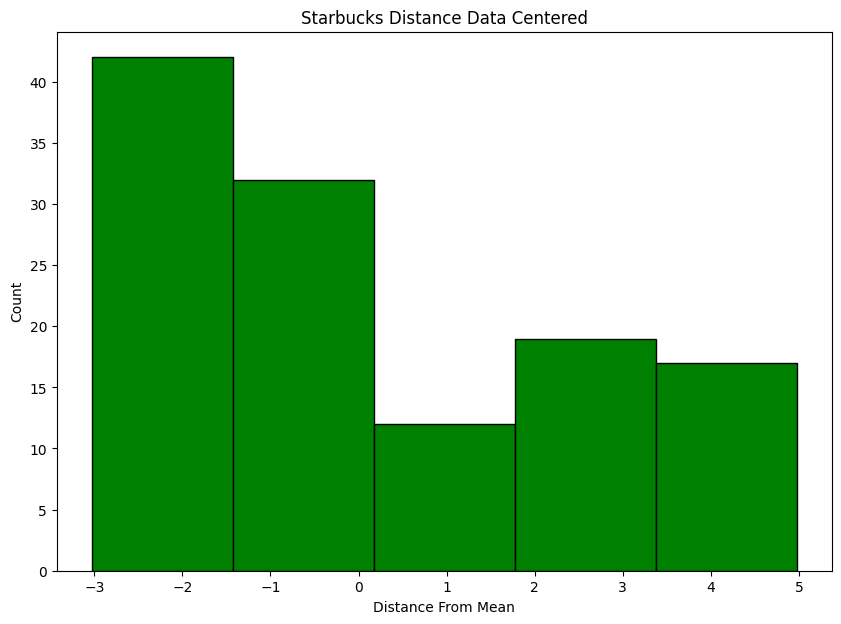

In [ ]:
# Visualize The New List
plt.figure(figsize=(10, 7))
plt.hist(centered_dis, bins=5, color='g', edgecolor='black')

# Label Our Visuals
plt.title('Starbucks Distance Data Centered')
plt.xlabel('Distance From Mean')
plt.ylabel('Count')
plt.show()

In [ ]:
# Another Feature
# Column: age
ages = coffee.age
ages.head()

,age
0,52
1,35
2,29
3,28
4,28


In [ ]:
# Acquire The Mean
mean_age = np.mean(ages)
mean_age

np.float64(27.33606557377049)

In [ ]:
# Create A Series Of Centered Data For The Feature age.
centered_age = ages - mean_age
centered_age.head()

,age
0,24.663934
1,7.663934
2,1.663934
3,0.663934
4,0.663934


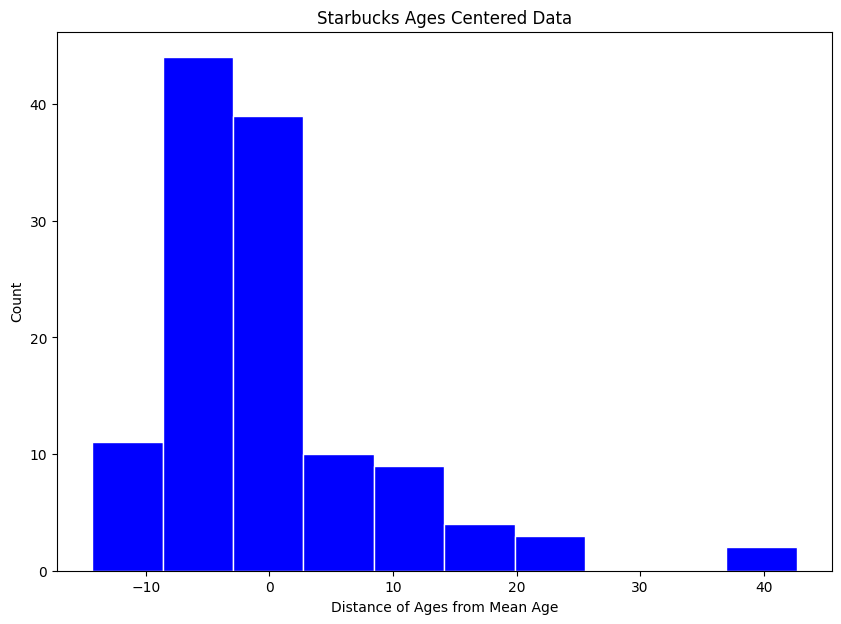

In [ ]:
# Visualize The Centered Data
plt.figure(figsize=(10, 7))
plt.hist(centered_age, color="blue", edgecolor="white")

#Labels The Visuals
plt.title("Starbucks Ages Centered Data")
plt.xlabel("Distance of Ages from Mean Age")
plt.ylabel("Count")
plt.show()

### 2. Standardizing Our Data
*Standardization* (also known as Z-Score normalization) is when we center our data, then divide it by the standard deviation. Once we do that, our entire data set will have a mean of zero and a standard deviation of one. This allows all of our features to be on the same scale.

#### Step-by-step arithmetic example:

Data: `[2, 4, 6, 8]`

1. Mean = (2+4+6+8) / 4 = 5.

2. Centered values = `[2−5, 4−5, 6−5, 8−5]` = `[−3, −1, +1, +3]`

3. Deviations from mean: `[-3, -1, +1, +3]`.

4. Variance = average of squared deviations = (9 + 1 + 1 + 9) / 4 = 5.
(Note: this is the population variance; scikit-learn uses this convention.)

5. Standard deviation = sqrt(5) ≈ **2.23607**.

6. Standardized values = (value − mean) / std =
`[(2−5)/2.236, (4−5)/2.236, (6−5)/2.236, (8−5)/2.236] ≈ [-1.3416, -0.4472, 0.4472, 1.3416]`.

#### Why do it?

*This step is critical because some **machine learning models** will treat all features equally regardless of their scale*. You’ll definitely want to standardize your data in the following situations:

* Before Principal Component Analysis
* Before using any clustering or distance based
algorithm(think KMeans or DBSCAN)
* Before KNN
* Before performing regularization methods like LASSO and Ridge

Summary:
Standardizing (a.k.a. z-score scaling) = subtract the mean and divide by the standard deviation for each feature. After standardizing, that feature has (approximately) mean `0` and standard deviation `1`.


#### Example:
If I wanted to see how customers rated quality vs. price, I could graph a scatter plot of those two features and easily see that customers tend to score those two questions closely. Notice the darker spots (meaning more data points are laying on top of one another) around the 3.0 for “Rate Quality” and 3.0 for “Rate Price” as an example. This insight was easy to see since our features are on the same one to five scale.
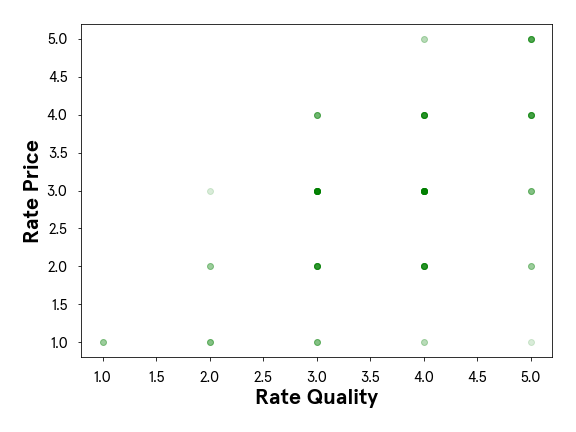

Now, what happens if I am working with features on two totally different scales? Perhaps the “customer age” and “how far they live from a Starbucks” feature? Let’s take a look.

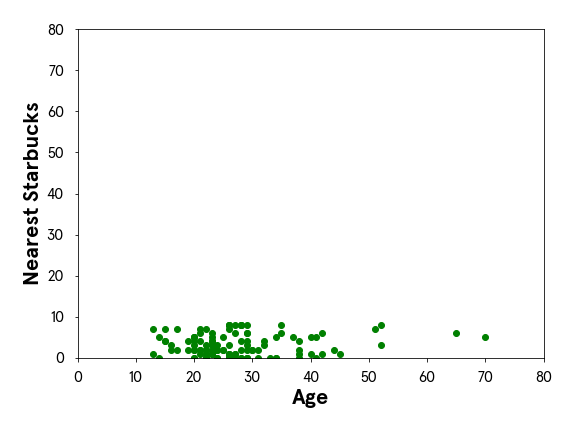

Looking at this, it is much more challenging to gain insight or even identify patterns within our data. This will be a similar experience for our machine learning models. That’s why when we standardize our entire dataset, we tend to see a more robust model performance if all features are on the same scale.

The mathematical formula will look like this:
### **<center><em>z = (value - mean)/stdev<em><center>**

In [ ]:
# Perform Standardizing
# Column: nearest_starbucks
distance = coffee['nearest_starbucks']

# The Mean Of Our Feature
mean_dis = np.mean(distance)

# The Standard Deviation Of Our Feature
std_dis = np.std(distance)

# Apply The Formula Of Z-score To Obtain Standarized Values
# Formula: z = (value-mean)/stdev
distance_standarized = (distance - mean_dis)/std_dis

# Print The Values
distance_standarized.head()

,nearest_starbucks
0,1.925084
1,1.925084
2,1.925084
3,1.925084
4,1.925084


In [ ]:
# Print The Type Of distance_standarized
print(type(distance_standarized))
# Output: <class 'pandas.core.series.Series'>

# Print The Mean Of distance_standarized
print(np.mean(distance_standarized))
# Output: -7.644158530205996e-17

# Print The Standard Deviation of distance_standarized
print(np.std(distance_standarized))
# Output: 1.0000000000000013

# Our outputs are basically mean = 0 and standard deviation = 1.

<class 'pandas.core.series.Series'>
-7.644158530205996e-17
1.0000000000000013


In [ ]:
# Another Feature
# Column: age
ages = coffee['age']

# The Mean Of age Feature
mean_age = np.mean(ages)
print(mean_age)

# The Standard Deviation Of age Feature
std_age = np.std(ages)
print(std_age)

# Standardize The Values Through The Z-score Formula
# Formula: z = (value - mean) / stdev
age_standardized = (ages - mean_age)/std_age

print(age_standardized)

27.33606557377049
9.428428111378786
0      2.615912
1      0.812854
2      0.176481
3      0.070418
4      0.070418
         ...   
117   -0.565955
118   -0.565955
119   -0.778079
120   -0.778079
121   -1.414453
Name: age, Length: 122, dtype: float64


In [ ]:
# The Mean Of age_standardized
print(np.mean(age_standardized))
# Output: 1.383228686418228e-16

# The Standard Deviation of age_standardized
print(np.std(age_standardized))
# Output: 1.0000000000000002

# Standardization of Data: The mean is almost zero and standard deviation is 1.

1.383228686418228e-16
1.0000000000000002


In [ ]:
# We Have Another Similar Method To Compute It.
X = pd.Series([2, 4, 6, 8])

# Compute The Mean
x_mean = X.mean()

# Compute The Standard Deviation
x_std = X.std(ddof=0) # This is Important, ddof=0 Matches The sklean StandardScaler behaviour

# Apply The z-score Formula
x_standardize = (X - x_mean)/x_std

# Print The Mean Of Standardized Data
print(np.mean(x_standardize))
# Output: 0.0

# Print The Standard Deviation Of Standardized Data
print(np.std(x_standardize))
# Output: 1.0

0.0
1.0


### 3. Standardizing our Data with Sklearn

What we learned before was the math behind the standardizing out data, now we can implement all of them together in just one command by importing `StandardScaler()` from `sklearn.preprocessing`.

#### StandardScaler = Mean-centering + Z-Score

We will begin by importing our `StandardScaler` library from `sklearn.preprocessing`.

```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
```

We instantiate the `StandardScaler` by setting it to a variable called **scaler**, which we can then use to transform our feature. The next step is to reshape our distance array. `StandardScaler` must take in our array as 1 column, so we’ll reshape our distance array using the `.reshape(-1,1)` method. This numpy method says to take our data and give it back to us as a 1-column, represented in the second value. The `-1` instructs numpy to determine the exact number of rows to create based on our data.

```
reshaped_data = np.array(data).reshape(-1, 1)
data_scaler = scaler.fit_transform(reshaped_data)
```

we do this so our data has a mean of 0 and standard deviation of 1.

```
print(np.mean(data_scaler))
# Output: almost a 0 or equal to 0.

print(np.std(data_scaler))
# Output: almost a 1 or equal to 1.
```

In [ ]:
# Import The Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
coffee = pd.read_csv('/content/starbucks_customers.csv')
coffee.head()

,spent,nearest_starbucks,age,rate_quality,rate_price,rate_promo,ambiance,wifi,service,meetings_hangout
0,13,8,52,4,4,4,4,4,4,4
1,25,8,35,4,5,5,4,4,3,3
2,10,8,29,2,1,5,2,2,2,2
3,7,8,28,4,1,4,5,3,3,4
4,10,8,28,4,2,4,4,3,4,3


In [ ]:
# Let's Perform The Standardizing
# Column: nearest_starbucks
distance = coffee['nearest_starbucks']
distance.head()

,nearest_starbucks
0,8
1,8
2,8
3,8
4,8


In [ ]:
# Set The 'StandardScaler()' To A Variable.
scaler = StandardScaler()

# Reshape The Data To Be In Perfect Standardized Form.
reshaped_distance = np.array(distance).reshape(-1,1)

# Standardized The Data Through Fitting The Data.
distance_scaler = scaler.fit_transform(reshaped_distance)

# Print The distance_scaler
distance_scaler

array([[ 1.92508375],
       [ 1.92508375],
       [ 1.92508375],
       [ 1.92508375],
       [ 1.92508375],
       [ 1.92508375],
       [ 1.92508375],
       [ 1.92508375],
       [ 1.92508375],
       [ 1.92508375],
       [ 1.53816411],
       [ 1.53816411],
       [ 1.53816411],
       [ 1.53816411],
       [ 1.53816411],
       [ 1.53816411],
       [ 1.53816411],
       [ 1.15124448],
       [ 1.15124448],
       [ 1.15124448],
       [ 1.15124448],
       [ 1.15124448],
       [ 1.15124448],
       [ 1.15124448],
       [ 1.15124448],
       [ 0.76432485],
       [ 0.76432485],
       [ 0.76432485],
       [ 0.76432485],
       [ 0.76432485],
       [ 0.76432485],
       [ 0.76432485],
       [ 0.76432485],
       [ 0.76432485],
       [ 0.76432485],
       [ 0.76432485],
       [ 0.37740522],
       [ 0.37740522],
       [ 0.37740522],
       [ 0.37740522],
       [ 0.37740522],
       [ 0.37740522],
       [ 0.37740522],
       [ 0.37740522],
       [ 0.37740522],
       [ 0

In [ ]:
# Print The Mean Of distance_scaler
print(np.mean(distance_scaler))
# Output: -9.464196275493137e-17

# Print The Standard Deviation Of distance_scaler
print(np.std(distance_scaler))
# Output: 0.9999999999999997

-9.464196275493137e-17
0.9999999999999997


In [ ]:
# Another Feature Example
# Column: age
ages = coffee['age']

# Set StandardScaler To A Variable
scaler = StandardScaler()

# Convert Them To An Array And Reshape The Feature
ages_reshaped = np.array(ages).reshape(-1, 1)

# Use '.fit_transform()' Method From StandardScaler To Standardize The Data
ages_scaled = scaler.fit_transform(ages_reshaped)

# Print The Mean Of Scaled Data
print(np.mean(ages_scaled))
# Output: 1.7290358580227847e-16

# Print The Standard Deviation Of Scaled Data
print(np.std(ages_scaled))
# Output: 0.9999999999999999

# Rounding Off
print(round(np.std(ages_scaled)))
# Output: 1

1.7290358580227847e-16
0.9999999999999999
1


### 4. Min-Max Normalization
The name says it all, we find the minimum and maximum data point in our entire data set and set each of those to 0 and 1, respectively. Then the rest of the data points will transform to a number between 0 and 1, depending on its distance between the minimum and maximum number. We find that transformed number by taking the data point subtracting it from the minimum point, then dividing by the value of our maximum minus minimum.

**Min–Max normalization** rescales a feature to a fixed range, usually **[0, 1]**.

Mathematically a min-max normalization looks like this:
#### <center><em>**X<sub>norm</sub>**=(X - X<sub>min</sub>)/(X<sub>max</sub> - X<sub>min</sub>)</em><center>

Note:
One thing to note about min-max normalization is that this transformation does not work well with data that has extreme outliers. You will want to perform a min-max normalization if the range between your min and max point is not too drastic.

#### Step-by-Step arithemetic example:
Data: `[2, 4, 6, 8]`

1. min = 2
2. max = 8
3. range = max - min = 8 - 2 = 6
4. Scale each value:
    * For 2: (2 - 2)/6 = 0/6 = 0
    * For 4: (4 - 2)/6 = 2/6 = 1/3 ~ 0.3333
    * For 6: (6 - 2)/6 = 4/6 = 2/3 ~ 0.6667
    * For 8: (8 - 2)/6 = 6/6 = 1
5. So the normalized vector = `[0.0, 0.3333, 0.6667, 1.0]`

#### Why Do It?
* The reason we would want to normalize our data is very similar to why we would want to standardize our data - getting everything on the same scale.

* Keeps data in a bounded interval — great for models or layers that expect inputs in a fixed range (e.g., image pixels scaled to [0,1], neural nets with sigmoid activations, certain distance metrics).

* Preserves the shape of the original distribution (no change to relative ordering).

* Intuitive when you want inputs in a known range.

#### Drawbacks
* **Very sensitive to outliers**. A single extreme value sets min or max and compresses most data into a tiny interval.

* **Must fit only on training data**. Compute min/max on the train set, then apply to validation/test sets to avoid data leakage.

* **Constant feature (min == max)**. Division by zero occurs. Libraries usually handle this by returning 0.0 for that feature (or you should drop/handle that column).

* **Not always preferable** for algorithms that assume gaussian-like inputs, those often do better with standardization (z-score).

In [ ]:
# Import The Libraries
import pandas as pd
import numpy as np

In [ ]:
# Import The CSV file
coffee = pd.read_csv('/content/starbucks_customers.csv')
coffee.head()

,spent,nearest_starbucks,age,rate_quality,rate_price,rate_promo,ambiance,wifi,service,meetings_hangout
0,13,8,52,4,4,4,4,4,4,4
1,25,8,35,4,5,5,4,4,3,3
2,10,8,29,2,1,5,2,2,2,2
3,7,8,28,4,1,4,5,3,3,4
4,10,8,28,4,2,4,4,3,4,3


In [ ]:
# Perform Min-Max Normalization
# Column: nearest_starbucks
distance = coffee['nearest_starbucks']
distance.head()

,nearest_starbucks
0,8
1,8
2,8
3,8
4,8


In [ ]:
# Find The Minimum Value In The Feature
distance_min = np.min(distance)
distance_min

0

In [ ]:
# Find The Maximum Value In The Feature
distance_max = np.max(distance)
distance_max

8

In [ ]:
# Apply The Formula Of Min-Max Normalization
distance_normalized = (distance - distance_min)/(distance_max - distance_min)
distance_normalized.head()

,nearest_starbucks
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
# Let's Check The Values Properly
distance_normalized.unique()
# Output: All the values are between 0 to 1.

array([1.   , 0.875, 0.75 , 0.625, 0.5  , 0.375, 0.25 , 0.125, 0.   ])

In [ ]:
# Another Feature
# Column: spent
spent = coffee['spent']

# Find The Minimum Value In The Feature
spent_min = np.min(spent)

# Find The Maximum Value In The Feature
spent_max = np.max(spent)

# Apply The Min-Max Normalization Formula
spent_normalized = (spent - spent_min)/ (spent_max - spent_min)

# Print The Normalized Values
spent_normalized.head()

,spent
0,0.464286
1,0.892857
2,0.357143
3,0.250000
4,0.357143


### 5. Min-Max Normalization with Sklearn
 We have understood the concept of behind the Min-Max Normalization. Now, we can try to implement it with scikit-learn library.

 We will start by importing our `MinMaxScaler` library from `sklearn.preprocessing`. Just like we covered in the `StandardScaler` exercise, we start by instantiating the `MinMaxScaler` by setting it to a variable called `mmscaler` which we can then use to transform our feature.

 ```
 from sklearn.preprocessing import MinMaxScaler
 mmscaler = MinMaxScaler()
 # or we can use 'MinMaxScaler(feature_range=(0, 1, clip=False)'
 ```

 The next step is to import our feature and reshape it so it is ready for our `mmscaler`.

 ```
 # Get Our Feature
 data = df['feature']

 # Convert The Data Into An Array And Then, Reshape It.
 reshaped_data = np.array(data).reshape(-1, 1)

 # '.fit_transform' Method To Normalize The Data.
 data_norm = mmscaler.fit_transform(reshaped_data)

 # Print The Values
 print(set(np.unique(data_norm)))
 ```

 We now have a normalized feature within our dataset using the sklearn library MinMaxScaler.


In [ ]:
# Import The Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Perform Min-Max Normalization On The Feature
# Column: nearest_starbucks
distance = coffee['nearest_starbucks']
distance.head()

,nearest_starbucks
0,8
1,8
2,8
3,8
4,8


In [ ]:
# Set The MinMaxScaler Function To The Variable
mmscaler = MinMaxScaler()

# Convert The Data Into An Array And Reshape It
reshaped_distance = np.array(distance).reshape(-1, 1)

# Normalize The Data By Fitting Into The Method '.fit_transform()'
distance_norm = mmscaler.fit_transform(reshaped_distance)

# Print The Outputs
print(set(np.unique(distance_norm)))

{np.float64(0.0), np.float64(0.125), np.float64(0.5), np.float64(0.25), np.float64(0.375), np.float64(0.625), np.float64(0.75), np.float64(0.875), np.float64(1.0)}


In [ ]:
# Another Feature
# Column: spent
spent = coffee['spent']

# Convert The data Into An Array And Reshape It
reshaped_spent = np.array(spent).reshape(-1, 1)

# Set The MinMaxScaler Function To The Variable
mmscaler = MinMaxScaler()

# Normalize The Data By Fitting Into The Method '.fit_transform()'
spent_scaled = mmscaler.fit_transform(reshaped_spent)

# Print The Normalized Data
print(set(np.unique(spent_scaled)))

# Print The Maximum And Minimum Of Scaled Data
print(f"Minimum Value: {np.min(spent_scaled)}")
print(f"Maximum Value: {np.max(spent_scaled)}")

{np.float64(0.0), np.float64(0.14285714285714285), np.float64(0.17857142857142855), np.float64(0.25), np.float64(0.2857142857142857), np.float64(0.3214285714285714), np.float64(0.3571428571428571), np.float64(0.39285714285714285), np.float64(0.5), np.float64(0.5357142857142857), np.float64(0.75), np.float64(1.0), np.float64(0.5714285714285714), np.float64(0.6428571428571428), np.float64(0.8928571428571428), np.float64(0.9642857142857142), np.float64(0.46428571428571425), np.float64(0.07142857142857142), np.float64(0.21428571428571427), np.float64(0.6071428571428571), np.float64(0.8571428571428571), np.float64(0.10714285714285714), np.float64(0.6785714285714285), np.float64(0.42857142857142855)}
Minimum Value: 0.0
Maximum Value: 1.0


### Binning Data
**Binning data** (also known as  **discretization**) is the process of taking numerical or categorical data and breaking it up into groups. We could decide to bin our data to help capture patterns in noisy data. There isn’t a clean and fast rule about how to bin your data, but like so many things in machine learning, you need to be aware of the trade-offs.

**Binning** (aka discretization) means converting a continuous numeric variable into a small number of discrete categories (“bins”).

#### Step-by-Step arithmetic example:
* Data: `[5, 12, 18, 25, 32, 45]`
* Count *n* = 6
* Step 1: Find min, max, and range

    min = 5
    max = 45
    range = 45 − 5 = 40

* Step 2: Bin width

    width = range ÷ 3 = 40 ÷ 3 = 13.33

* Step 3: Define bins

    Bin1: [5, 18.33)

    Bin2: [18.33, 31.66)

    Bin3: [31.66, 45]

* Step 4: Assign Values
     | Value | Bin  |
     | :---: | :--- |
     |   5   | Bin1 |
     |   12  | Bin1 |
     |   18  | Bin1 |
     |   25  | Bin2 |
     |   32  | Bin3 |
     |   45  | Bin3 |

#### Common Methods:
* **Equal-width**: split range into k bins of same numeric width.

* **Equal-frequency (quantile)**: each bin has ~same number of samples.

* **K-means / clustering**: cut into bins based on clustering of values.

* **Supervised discretization**: choose cuts that best separate the target (e.g., ChiMerge, decision-tree based).

* **Custom / domain-driven**: use domain knowledge (age groups, salary brackets).

#### Why do it?
- Easier interpretability, robustness to small fluctuations, sometimes better model performance.

#### Disadvantage:
- Loss of information (**precision**), arbitrary cut choices can distort relationships, introduces discontinuities at bin edges.

In [ ]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import the dataset
coffee = pd.read_csv('/content/starbucks_customers.csv')
coffee.head()

,spent,nearest_starbucks,age,rate_quality,rate_price,rate_promo,ambiance,wifi,service,meetings_hangout
0,13,8,52,4,4,4,4,4,4,4
1,25,8,35,4,5,5,4,4,3,3
2,10,8,29,2,1,5,2,2,2,2
3,7,8,28,4,1,4,5,3,3,4
4,10,8,28,4,2,4,4,3,4,3


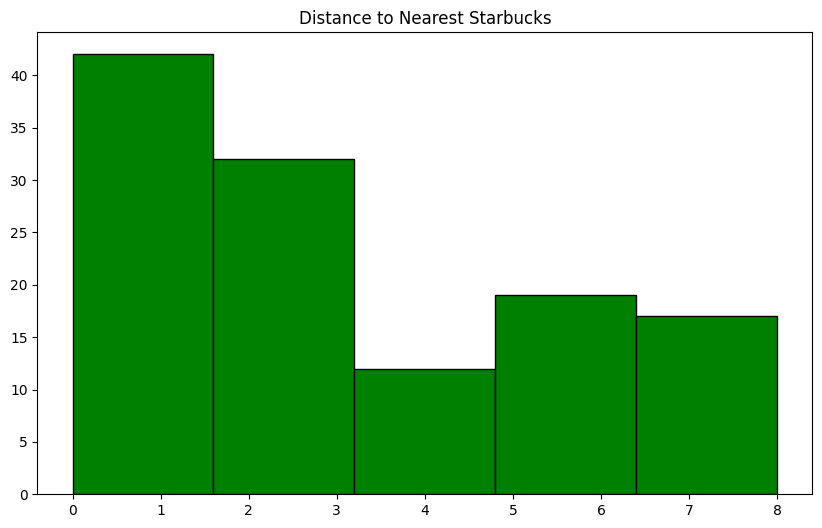

In [ ]:
# Visualize the Data
plt.figure(figsize=(10, 6))
plt.hist(coffee['nearest_starbucks'], bins=5, color='green', edgecolor='black')
plt.title("Distance to Nearest Starbucks")
plt.show()

# This graph shows the amount of people live near Starbucks, which also help us understand the amount of customers.

 I wonder how our data would transform if we were to bin our data in the following way:

* distance < 1km
* 1.1km <= distance < 3km
* 3.1km <= distance < 5km
* 5.1km <= distance

In [ ]:
bins = [0, 1, 3, 5, 8.1]

Now you may be asking yourself ‘Why end at 8.1? Isn’t our max value 8?’ That is true! We have 8.1 and not 8 because the pandas function we will use pd.cut() has a parameter where it will include the lower bound, and excludes the upper bound.

In [ ]:
coffee['binned_distance'] = pd.cut(coffee['nearest_starbucks'], bins, right = False)

print(coffee[['binned_distance', 'nearest_starbucks']].head(3))

#output
#  binned_distance  nearest_starbucks
#0      [5.0, 8.1)                  8
#1      [5.0, 8.1)                  8
#2      [5.0, 8.1)                  8

  binned_distance  nearest_starbucks
0      [5.0, 8.1)                  8
1      [5.0, 8.1)                  8
2      [5.0, 8.1)                  8


We can see that those who marked 8 km now live in the [5.0, 8.1) bucket. The bracket [ tells us 5.0 is included, and the parenthesis ) tells us that 8.1 is excluded. We could write it as an inequality statement like this: 5 <= distance < 8.1 this allows our customers who marked 8 to belong to the ‘Lives greater than 5.1 km’ bin.

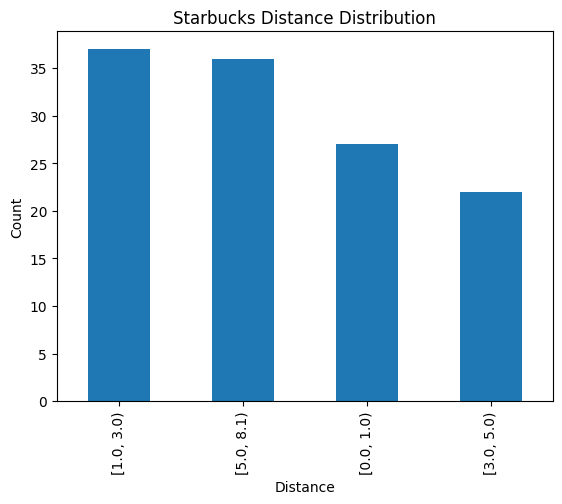

In [ ]:
# Plot the graph of binned distances
coffee['binned_distance'].value_counts().plot(kind='bar')

# Label the bar graph
plt.title('Starbucks Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Count')

# Show the bar graph
plt.show()

In [ ]:
# Now, let's take another feature.
# Feature: age
ages = coffee['age']
ages.head()

,age
0,52
1,35
2,29
3,28
4,28


In [ ]:
# Find the minimum and maximum of the ages
print(f"Maximum Age: {ages.max()}")
print(f"Minimum Age: {ages.min()}")

Maximum Age: 70
Minimum Age: 13


In [ ]:
# Lets form bins for ages
age_bins = [12, 20, 30, 40, 71]

In [ ]:
# Now, we have to use 'pd.cut' to include the lower bound and exclude the upper bound.
# 'pd.cut()' function is also useful for going from a continuous variable to a categorical variable.
coffee['binned_ages'] = pd.cut(ages, age_bins, right=True)
coffee['binned_ages'].head()

,binned_ages
0,"(40, 71]"
1,"(30, 40]"
2,"(20, 30]"
3,"(20, 30]"
4,"(20, 30]"


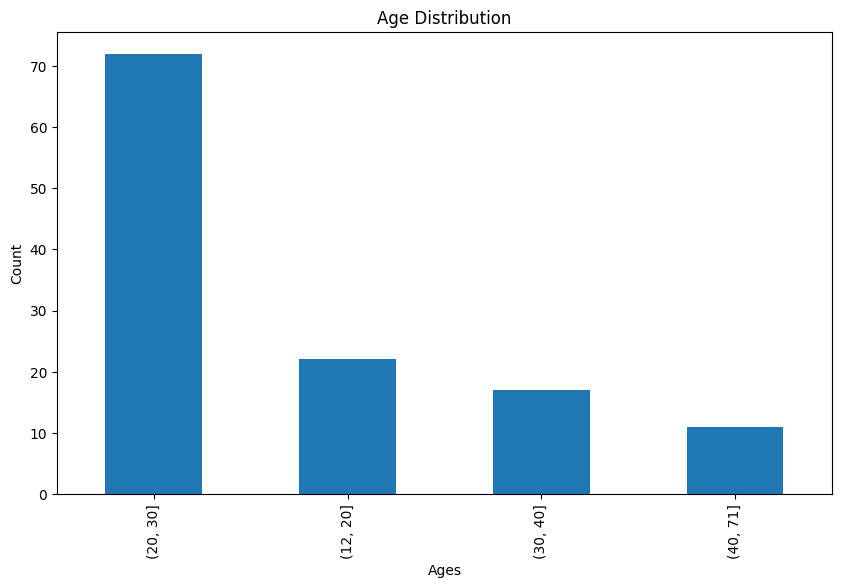

In [ ]:
# Plot the graph
plt.figure(figsize=(10, 6))
coffee['binned_ages'].value_counts().plot(kind='bar')
plt.title("Age Distribution")
plt.xlabel("Ages")
plt.ylabel("Count")
plt.show()

### Natural Log Transformation

**Logarithms** are an essential tool in statistical analysis and machine learning preparation. This transformation works well for right-skewed data and data with large outliers. After we log transform our data, one large benefit is that it will allow the data to be closer to a “normal” distribution. It also changes the scale so our data points will drastically reduce the range of their values.

#### Step-by-Step arithmetic example:
Data: `[2, 4, 6, 8]`

* Apply natural log to each value (using **ln(x)**, base **e**)

* Compute invidually:
1. for 2: ln(2) = 0.6931
2. for 4: ln(4) = 1.3863
3. for 6: ln(6) = 1.7918
4. for 8: ln(8) = 2.0794

* So the log-transformed vector:
<center>[0.6931, 1.3863, 1.7918, 2.0794]</center>

#### Why do we use it?
We use natural logarithms to handle skewed data, convert multiplicative relationships into additive ones, stabilize variance, and improve learning and convergence of models.

1. Mathematically optimal for growth processes
   * Many real-world phenomena follow exponential behavior with base e.

2. Best behaved derivatives
   * Makes optimization (gradient descent) simpler and more stable.

3. Standard in statistics and ML theory
   * Used in likelihood functions, entropy, cross-entropy, and KL divergence.

4. Other bases give same shape
   * Only scaling differs, ln is preferred by convention and theory.

#### Advantages of Natural Log Transformation
1. Reduces skewness
2. Stabilizes Variance
3. Converts  multiplicative -> additive relationships
4. Imporves model performance
5. Interpretable coefficients
6. Reduces impact of outliers

#### Disadvantages of Natural Log Transformation
1. Cannot handle zero or negative values directly
2. Loss of original scale
3. Bias when back-transforming perdictions
4. Not useful for all models
5. Interpretation becomes indirect


1. Using a log transformation in a machine learning model will require some extra interpretation. For example, if you were to log transform your data in a linear regression model, our independent variable has a multiplication relationship with our dependent variable instead of the usual additive relationship we would have if our data was not log-transformed.

2. Keep in mind, just because your data is skewed does not mean that a log transformation is the best answer. You would not want to log transform your feature if:
   * You have values less than 0. The natural logarithm (which is what we’ve been talking about) of a negative number is undefined.
    * You have left-skewed data. That data may call for a square or cube transformation.
    * You have non-parametric data.

In [ ]:
# Import The Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import Our DataFrame
cars = pd.read_csv('cars.csv')
cars.head()

,Unnamed: 0,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16
0,449069,2006,Chrysler,300,Base,Sedan,automatic,2c3ka43r76h366165,il,1.9,119618.0,blue,gray,go financial,4775,2500,Thu May 28 2015 03:00:00 GMT-0700 (PDT),NaN
1,197199,2014,Volkswagen,Jetta,S,Sedan,manual,3vw1k7aj9em275429,ca,4.9,7740.0,—,black,volkswagen credit inc/sc,12050,12750,Wed Jul 01 2015 09:30:00 GMT-0700 (PDT),NaN
2,288171,2007,Dodge,Durango,SLT,SUV,automatic,1d8hd48p97f510727,fl,1.9,166628.0,gold,tan,mid atlantic finance/clearwater,2850,2700,Wed Feb 11 2015 08:00:00 GMT-0800 (PST),NaN
3,277025,2013,Mercedes-Benz,E-Class,E350 Sport,Sedan,automatic,wddhf5kb3da735753,tx,3.8,23923.0,white,off-white,mercedes-benz financial services,32200,32000,Thu Feb 12 2015 03:00:00 GMT-0800 (PST),NaN
4,322760,2013,Ford,Explorer,XLT,SUV,automatic,1fm5k8d84dgc59887,mi,5.0,18494.0,red,black,"ford motor credit company,llc",29100,28100,Thu Jun 11 2015 02:30:00 GMT-0700 (PDT),NaN


In [ ]:
# Let's take the feature
# Feature: odometer
odometer = cars['odometer']
odometer.head()

,odometer
0,119618.0
1,7740.0
2,166628.0
3,23923.0
4,18494.0


This histogram is right-skewed, where the majority of our data is located on the left side of our graph. If we were to provide this feature to our machine learning model it will see a lot of different cars with odometer readings off on the left of our graph. It will not see a lot of examples with very high odometer readings. This may cause issues with our model, as it may struggle to pick up on patterns that are within those examples off on the right side of our histogram.

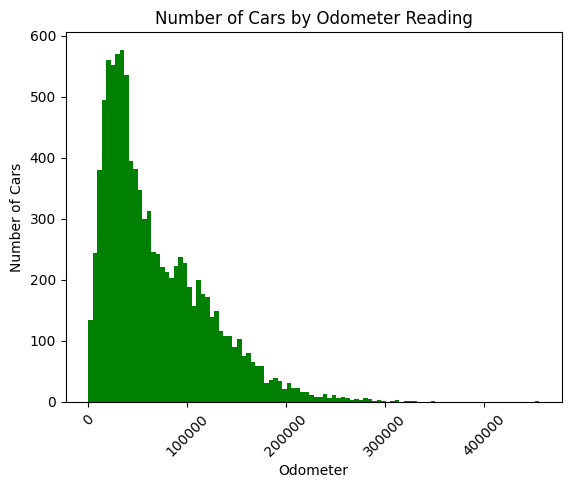

In [ ]:
# Graph Our Odometer readings
plt.hist(odometer, bins = 100, color='g')

# Add the labels
plt.xticks(rotation=45)
plt.title('Number of Cars by Odometer Reading')
plt.ylabel('Number of Cars')
plt.xlabel('Odometer')
plt.show();

We’ll perform a log transformation using numpy to see how our data will transform.

In [ ]:
# Perform The Log Transformation
log_car = np.log(cars['odometer'])
log_car.head()

,odometer
0,11.692059
1,8.954157
2,12.023519
3,10.082596
4,9.825202


Our data looks much closer to a normal distribution! If we were to look at a sample of five different cars with varying odometer readings, let’s examine how the log transformation changed their values.

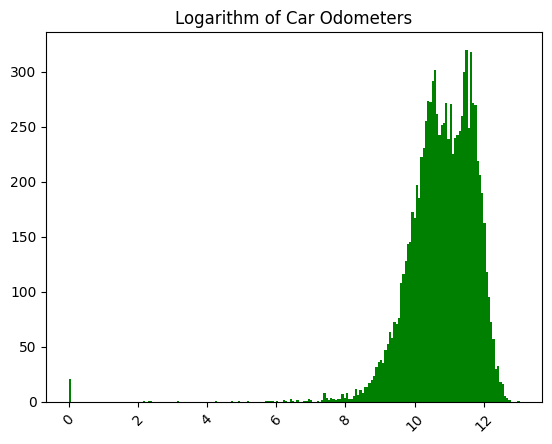

In [ ]:
# Graph Our Transformation
plt.hist(log_car, bins=200, color='g')

# Add The Labels
plt.xticks(rotation=45)
plt.title('Logarithm of Car Odometers')
plt.show()

| make   | odometer | odometer_logged |
|:-------|--------:|----------------:|
| Altima |  10126  |        9.222862 |
| Jetta  |  34042  |       10.435350 |
| Camry  |  56762  |       10.946622 |
| Civic  | 100103  |       11.513955 |
| F-150  | 145695  |       11.889271 |
| Saturn | 151687  |       11.929574 |


If we compare the Altima with 10,126 miles to the Saturn with 151,687 miles those two cars have a huge difference in odometer readings. Yet, once we log transform the data we see the range from 9.22 to 11.93 is much smaller. Compressing the range of our data can help our model perform better!

In [ ]:
# Let's Perform On Another Feature
# Feature: sellingprice
prices = cars['sellingprice']
prices.head()

,sellingprice
0,2500
1,12750
2,2700
3,32000
4,28100


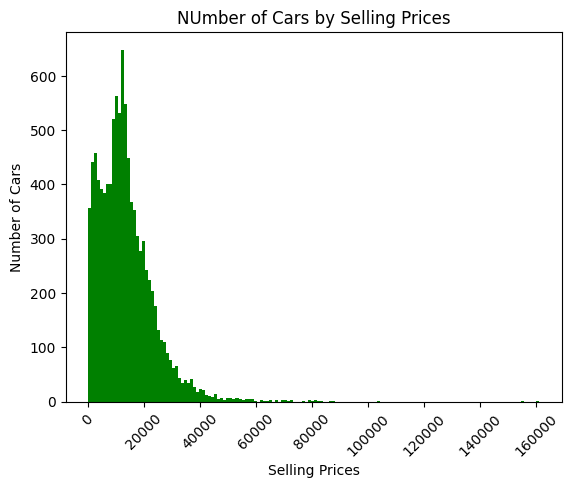

In [ ]:
# Graph The Selling Prices
plt.hist(prices, bins=150, color='g')
plt.xticks(rotation=45)
plt.xlabel("Selling Prices")
plt.ylabel("Number of Cars")
plt.title("NUmber of Cars by Selling Prices")
plt.show();

In [ ]:
# Form The Logarithmic Prices
log_prices = np.log(prices)
log_prices.head()

,sellingprice
0,7.824046
1,9.453287
2,7.901007
3,10.373491
4,10.243525


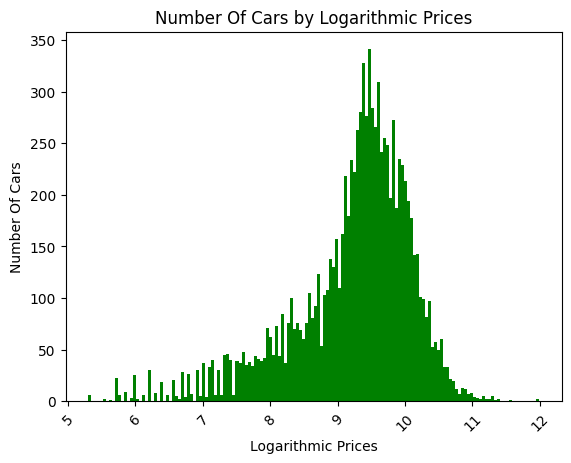

In [ ]:
# Graph The Logarithmic Prices
plt.hist(log_prices, bins=150, color='g')

# Add The Labels On The Graph
plt.xticks(rotation=45)
plt.xlabel("Logarithmic Prices")
plt.ylabel("Number Of Cars")
plt.title("Number Of Cars by Logarithmic Prices")
plt.show();

## Feature Engineering: Encoding Categorical Variables

Categorical data is data that has more than one category. When working with that type of data we have two types, nominal and ordinal. Nominal data is data that has no particular order or hierarchy to it, and ordinal data is categorical data where the categories have order, but the differences between the categories are not important or unclear.


In [ ]:
# Import Our Libraries
import pandas as pd

In [ ]:
# Import The Dataset
cars = pd.read_csv('cars.csv')

In [ ]:
# Check Variable/Features Types
cars.dtypes
## OUTPUT:
# year              int64
# make             object
# model            object
# trim             object
# body             object
# transmission     object
# vin              object
# state            object
# condition        object
# odometer        float64
# color            object
# interior         object
# seller           object
# mmr               int64
# sellingprice      int64
# saledate         object

,0
Unnamed: 0,int64
year,int64
make,object
model,object
trim,object
body,object
transmission,object
vin,object
state,object
condition,float64


### Ordinal Encoding

Ordinal encoding converts a categorical variable that has a natural order (e.g., `low < medium < high`, or `freshman < sophomore < junior < senior`) into integers that reflect that order (e.g., `0, 1, 2` or `1, 2, 3, 4`).

#### Step-by-Step Example:
* Data: `['low', 'medium', 'high', 'low']`

* Decide a mapping based on the natural order
e.g. `low -> 0`, `medium -> 1`, `high -> 2`

* Replace each category with mapped integer

  * low -> 0
  * medium -> 1
  * high -> 2
  * medium -> 1
  * low -> 0

* Resulting encoded vector:

<center>[0, 1, 2, 1, 0]</center>

#### Advantages:
* Simple and compact(onecolumn replaces category strings).

* Preserves order information, which is useful for models that can use ordinal relationships.
* Works well with tree-based models and many linear models when order matters.

#### Disadvantages:
* Implies numeric distance, mapping `low=0, medium=1, high=2` suggests the gap between `low->medium` equals `medium->high`, that may be false.

* For linear models the numeric distances can be interpreted as linear effects, possibly misleading.

* If you have unseen categories at prediction time, you must handle them explicitly (give a special code or raise error).

* Not appropriate for nominal categories, use one-hot encoding instead.
